In [104]:
from imblearn.under_sampling import NearMiss
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import RandomUnderSampler  
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import ADASYN
from sklearn.metrics import *


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [161]:
df = pd.read_csv('../dataset/BankChurners.csv').iloc[:,1:-2]
df.shape

(10127, 20)

In [162]:
X = df.drop('Attrition_Flag', axis = 1)
Y = df['Attrition_Flag']

### 1. 전체 데이터 셋 

In [179]:
encoding_columns = ['Attrition_Flag','Gender','Education_Level','Marital_Status','Income_Category','Card_Category']
not_encoding_columns = ['Customer_Age','Dependent_count','Months_on_book','Total_Relationship_Count',
                       'Months_Inactive_12_mon','Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy',
                        'Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']

In [180]:
enc_classes = {} 
def encoding_label(x):   # x: 범주형 타입의 컬럼(Series)
    le = LabelEncoder()
    le.fit(x)
    label = le.transform(x)
    enc_classes[x.name] = le.classes_   # x.name: 컬럼명
    return label

In [181]:
d1 = df[encoding_columns].apply(encoding_label)
d2 = df[not_encoding_columns]
data = d1.join(d2)
print(data.shape)
data.head()

(10127, 20)


,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,1,3,1,2,0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,0,2,2,4,0,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,1,2,1,3,0,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,0,3,3,4,0,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,1,5,1,2,0,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [182]:
X = data.drop(columns='Attrition_Flag')
y = data['Attrition_Flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 123)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(7088, 19) (3039, 19)
(7088,) (3039,)


In [183]:
dt_clf=DecisionTreeClassifier()
param={ "max_depth":[2, 3, 4, 5, 6], 
       "min_samples_split":[2, 3, 4, 5] }

grid_dtree = GridSearchCV(dt_clf, param_grid=param, cv=3, refit=True)
grid_dtree.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_split': [2, 3, 4, 5]})

In [184]:
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dtree.best_score_))
estimator = grid_dtree.best_estimator_
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

GridSearchCV 최적 파라미터: {'max_depth': 6, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.9338
테스트 데이터 세트 정확도: 0.9404


In [185]:
dt_clf=DecisionTreeClassifier(max_depth=6, min_samples_split=2, random_state=8)
dt_clf.fit(X_train,y_train)
pred_y = dt_clf.predict(X_test)
acc_test = accuracy_score(y_test, pred_y)
acu_roc = roc_auc_score(y_test, pred_y)
recall = recall_score(y_test, pred_y)
precision = precision_score(y_test, pred_y)
# f1_score = f1_score(y_test, pred_y)

print(f'accuracy: {acc_test}, roc_auc: {acu_roc}')
print('precision:', precision)
print('recall:', recall)
print('f1_score:', (2*(precision*recall))/(precision+recall))

accuracy: 0.9401118789075353, roc_auc: 0.8664775660131676
precision: 0.9571537872991583
recall: 0.9727838258164853
f1_score: 0.9649055148476668


Feature importances:
[0.    0.    0.    0.    0.    0.01  0.001 0.    0.113 0.016 0.001 0.003
 0.222 0.004 0.048 0.137 0.39  0.051 0.005]
Gender : 0.000
Education_Level : 0.000
Marital_Status : 0.000
Income_Category : 0.000
Card_Category : 0.000
Customer_Age : 0.010
Dependent_count : 0.001
Months_on_book : 0.000
Total_Relationship_Count : 0.113
Months_Inactive_12_mon : 0.016
Contacts_Count_12_mon : 0.001
Credit_Limit : 0.003
Total_Revolving_Bal : 0.222
Avg_Open_To_Buy : 0.004
Total_Amt_Chng_Q4_Q1 : 0.048
Total_Trans_Amt : 0.137
Total_Trans_Ct : 0.390
Total_Ct_Chng_Q4_Q1 : 0.051
Avg_Utilization_Ratio : 0.005
************************************
importance가 0보다 큰 columns:


[('Months_on_book', 0.0001941102219856959),
 ('Dependent_count', 0.0012098851305482174),
 ('Contacts_Count_12_mon', 0.0013660666766119299),
 ('Credit_Limit', 0.0029353065217116404),
 ('Avg_Open_To_Buy', 0.0035218295944066547),
 ('Avg_Utilization_Ratio', 0.004727051637648141),
 ('Customer_Age', 0.00980143818657381),
 ('Months_Inactive_12_mon', 0.016185319476673798),
 ('Total_Amt_Chng_Q4_Q1', 0.048309677544069105),
 ('Total_Ct_Chng_Q4_Q1', 0.050515657650612736),
 ('Total_Relationship_Count', 0.1125612669222153),
 ('Total_Trans_Amt', 0.13657517409088948),
 ('Total_Revolving_Bal', 0.22229683654693036),
 ('Total_Trans_Ct', 0.389800379799123)]

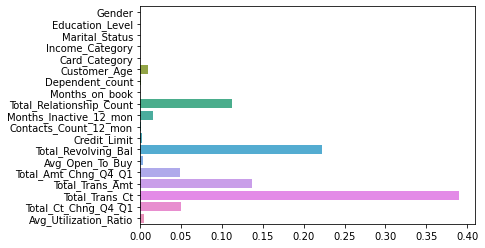

In [186]:
import seaborn as sns
import numpy as np
print('Feature importances:\n{0}'.format(np.round(dt_clf.feature_importances_, 3)))

top_lst = {}
lst = []

for name, value in zip(X_train.columns, dt_clf.feature_importances_):
    top_lst[name] = value
    print('{0} : {1:.3f}'.format(name, value))
sns.barplot(x = dt_clf.feature_importances_, y = X_train.columns)

sorted_dict = sorted(top_lst.items(), key = lambda item :item[1])
for i in sorted_dict:
    if i[1] > 0:
        lst.append(i)
print('************************************')
print('importance가 0보다 큰 columns:')
lst

### 2. 신용 관련 데이터만 넣은 셋

In [187]:
encoding_columns = ['Attrition_Flag','Gender','Education_Level','Marital_Status','Income_Category','Card_Category']
not_encoding_columns = ['Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy',
                        'Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']

In [188]:
enc_classes = {} 
def encoding_label(x):   # x: 범주형 타입의 컬럼(Series)
    le = LabelEncoder()
    le.fit(x)
    label = le.transform(x)
    enc_classes[x.name] = le.classes_   # x.name: 컬럼명
    return label

In [189]:
d1 = df[encoding_columns].apply(encoding_label)
d2 = df[not_encoding_columns]
data = d1.join(d2)
print(data.shape)
data.head()

(10127, 14)


,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,1,3,1,2,0,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,0,2,2,4,0,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,1,2,1,3,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,0,3,3,4,0,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,1,5,1,2,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [190]:
X = data.drop(columns='Attrition_Flag')
y = data['Attrition_Flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 123)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(7088, 13) (3039, 13)
(7088,) (3039,)


In [191]:
dt_clf=DecisionTreeClassifier()
param={ "max_depth":[2, 3, 4, 5, 6], 
       "min_samples_split":[2, 3, 4, 5] }

grid_dtree = GridSearchCV(dt_clf, param_grid=param, cv=3, refit=True)
grid_dtree.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_split': [2, 3, 4, 5]})

In [192]:
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dtree.best_score_))
estimator = grid_dtree.best_estimator_
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

GridSearchCV 최적 파라미터: {'max_depth': 6, 'min_samples_split': 3}
GridSearchCV 최고 정확도: 0.9268
테스트 데이터 세트 정확도: 0.9365


In [193]:
dt_clf=DecisionTreeClassifier(max_depth=6, min_samples_split=3, random_state=8)
dt_clf.fit(X_train,y_train)
pred_y = dt_clf.predict(X_test)
acc_test = accuracy_score(y_test, pred_y)
acu_roc = roc_auc_score(y_test, pred_y)
recall = recall_score(y_test, pred_y)
precision = precision_score(y_test, pred_y)
# f1_score = f1_score(y_test, pred_y)

print(f'accuracy: {acc_test}, roc_auc: {acu_roc}')
print('precision:', precision)
print('recall:', recall)
print('f1_score:', (2*(precision*recall))/(precision+recall))

accuracy: 0.9361632115827575, roc_auc: 0.8860513152680324
precision: 0.9659090909090909
recall: 0.9583981337480559
f1_score: 0.9621389539422326


Feature importances:
[0.002 0.    0.    0.    0.001 0.002 0.242 0.01  0.062 0.201 0.395 0.078
 0.006]
Gender : 0.002
Education_Level : 0.000
Marital_Status : 0.000
Income_Category : 0.000
Card_Category : 0.001
Credit_Limit : 0.002
Total_Revolving_Bal : 0.242
Avg_Open_To_Buy : 0.010
Total_Amt_Chng_Q4_Q1 : 0.062
Total_Trans_Amt : 0.201
Total_Trans_Ct : 0.395
Total_Ct_Chng_Q4_Q1 : 0.078
Avg_Utilization_Ratio : 0.006
************************************
importance가 0보다 큰 columns:


[('Card_Category', 0.001362413962394096),
 ('Credit_Limit', 0.0017604649637380774),
 ('Gender', 0.0020492715084121324),
 ('Avg_Utilization_Ratio', 0.006485090669744157),
 ('Avg_Open_To_Buy', 0.009702424706377884),
 ('Total_Amt_Chng_Q4_Q1', 0.06188034446347319),
 ('Total_Ct_Chng_Q4_Q1', 0.07826357599606937),
 ('Total_Trans_Amt', 0.2012758144045402),
 ('Total_Revolving_Bal', 0.2419807576260608),
 ('Total_Trans_Ct', 0.39523984169919013)]

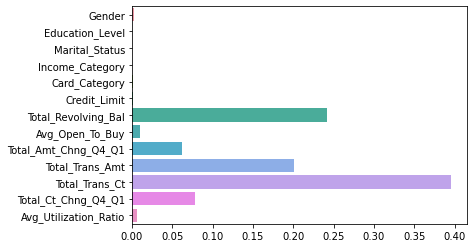

In [194]:
import seaborn as sns
import numpy as np
print('Feature importances:\n{0}'.format(np.round(dt_clf.feature_importances_, 3)))

top_lst = {}
lst = []

for name, value in zip(X_train.columns, dt_clf.feature_importances_):
    top_lst[name] = value
    print('{0} : {1:.3f}'.format(name, value))
sns.barplot(x = dt_clf.feature_importances_, y = X_train.columns)

sorted_dict = sorted(top_lst.items(), key = lambda item :item[1])
for i in sorted_dict:
    if i[1] > 0:
        lst.append(i)
print('************************************')
print('importance가 0보다 큰 columns:')
lst

### 3. 신용 관련 데이터 뺀 셋

In [195]:
encoding_columns = ['Attrition_Flag','Gender','Education_Level','Marital_Status','Income_Category','Card_Category']
not_encoding_columns = ['Customer_Age','Dependent_count','Months_on_book','Total_Relationship_Count',
                       'Months_Inactive_12_mon','Contacts_Count_12_mon']

In [31]:
enc_classes = {} 
def encoding_label(x):   # x: 범주형 타입의 컬럼(Series)
    le = LabelEncoder()
    le.fit(x)
    label = le.transform(x)
    enc_classes[x.name] = le.classes_   # x.name: 컬럼명
    return label

In [196]:
d1 = df[encoding_columns].apply(encoding_label)
d2 = df[not_encoding_columns]
data = d1.join(d2)
print(data.shape)
data.head()

(10127, 12)


,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon
0,1,1,3,1,2,0,45,3,39,5,1,3
1,1,0,2,2,4,0,49,5,44,6,1,2
2,1,1,2,1,3,0,51,3,36,4,1,0
3,1,0,3,3,4,0,40,4,34,3,4,1
4,1,1,5,1,2,0,40,3,21,5,1,0


In [197]:
X = data.drop(columns='Attrition_Flag')
y = data['Attrition_Flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 123)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(7088, 11) (3039, 11)
(7088,) (3039,)


In [198]:
dt_clf=DecisionTreeClassifier()
param={ "max_depth":[2, 3, 4, 5, 6], 
       "min_samples_split":[2, 3, 4, 5] }

grid_dtree = GridSearchCV(dt_clf, param_grid=param, cv=3, refit=True)
grid_dtree.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_split': [2, 3, 4, 5]})

In [199]:
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dtree.best_score_))
estimator = grid_dtree.best_estimator_
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

GridSearchCV 최적 파라미터: {'max_depth': 6, 'min_samples_split': 5}
GridSearchCV 최고 정확도: 0.8517
테스트 데이터 세트 정확도: 0.8618


In [200]:
dt_clf=DecisionTreeClassifier(max_depth=6, min_samples_split=5, random_state=8)
dt_clf.fit(X_train,y_train)
pred_y = dt_clf.predict(X_test)
acc_test = accuracy_score(y_test, pred_y)
acu_roc = roc_auc_score(y_test, pred_y)
recall = recall_score(y_test, pred_y)
precision = precision_score(y_test, pred_y)
# f1_score = f1_score(y_test, pred_y)

print(f'accuracy: {acc_test}, roc_auc: {acu_roc}')
print('precision:', precision)
print('recall:', recall)
print('f1_score:', (2*(precision*recall))/(precision+recall))

accuracy: 0.861796643632774, roc_auc: 0.559083824817421
precision: 0.8620457604306864
recall: 0.9961119751166407
f1_score: 0.9242424242424242


Feature importances:
[0.008 0.    0.005 0.004 0.    0.016 0.006 0.044 0.199 0.183 0.536]
Gender : 0.008
Education_Level : 0.000
Marital_Status : 0.005
Income_Category : 0.004
Card_Category : 0.000
Customer_Age : 0.016
Dependent_count : 0.006
Months_on_book : 0.044
Total_Relationship_Count : 0.199
Months_Inactive_12_mon : 0.183
Contacts_Count_12_mon : 0.536
************************************
importance가 0보다 큰 columns:


[('Income_Category', 0.004244031054009384),
 ('Marital_Status', 0.005358550513410111),
 ('Dependent_count', 0.005553209841754455),
 ('Gender', 0.008458436761854569),
 ('Customer_Age', 0.015584942352659031),
 ('Months_on_book', 0.04382886939850703),
 ('Months_Inactive_12_mon', 0.18257778319810575),
 ('Total_Relationship_Count', 0.1986670242004471),
 ('Contacts_Count_12_mon', 0.5357271526792525)]

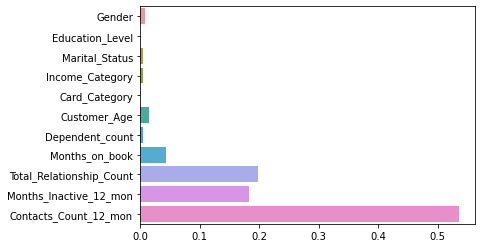

In [201]:
import seaborn as sns
import numpy as np
print('Feature importances:\n{0}'.format(np.round(dt_clf.feature_importances_, 3)))

top_lst = {}
lst = []

for name, value in zip(X_train.columns, dt_clf.feature_importances_):
    top_lst[name] = value
    print('{0} : {1:.3f}'.format(name, value))
sns.barplot(x = dt_clf.feature_importances_, y = X_train.columns)

sorted_dict = sorted(top_lst.items(), key = lambda item :item[1])
for i in sorted_dict:
    if i[1] > 0:
        lst.append(i)
print('************************************')
print('importance가 0보다 큰 columns:')
lst

### 피쳐 6개

In [215]:
# encoding_columns = ['Attrition_Flag','Gender','Education_Level','Marital_Status','Income_Category','Card_Category']
# not_encoding_columns = ['Customer_Age','Dependent_count','Months_on_book','Total_Relationship_Count',
#                        'Months_Inactive_12_mon','Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy',
#                         'Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']
encoding_columns = ['Attrition_Flag', 'Months_on_book']
not_encoding_columns = ['Total_Trans_Ct','Total_Trans_Amt','Total_Revolving_Bal','Total_Relationship_Count','Contacts_Count_12_mon','Total_Ct_Chng_Q4_Q1','Months_Inactive_12_mon']

In [216]:
enc_classes = {} 
def encoding_label(x):   # x: 범주형 타입의 컬럼(Series)
    le = LabelEncoder()
    le.fit(x)
    label = le.transform(x)
    enc_classes[x.name] = le.classes_   # x.name: 컬럼명
    return label

In [217]:
d1 = df[encoding_columns].apply(encoding_label)
d2 = df[not_encoding_columns]
data = d1.join(d2)
print(data.shape)
data.head()

(10127, 9)


,Attrition_Flag,Months_on_book,Total_Trans_Ct,Total_Trans_Amt,Total_Revolving_Bal,Total_Relationship_Count,Contacts_Count_12_mon,Total_Ct_Chng_Q4_Q1,Months_Inactive_12_mon
0,1,26,42,1144,777,5,3,1.625,1
1,1,31,33,1291,864,6,2,3.714,1
2,1,23,20,1887,0,4,0,2.333,1
3,1,21,20,1171,2517,3,1,2.333,4
4,1,8,28,816,0,5,0,2.500,1


In [218]:
X = data.drop(columns='Attrition_Flag')
y = data['Attrition_Flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 123)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(7088, 8) (3039, 8)
(7088,) (3039,)


In [219]:
d1 = df[encoding_columns].apply(encoding_label)
d2 = df[not_encoding_columns]
data = d1.join(d2)
print(data.shape)
data.head()

(10127, 9)


,Attrition_Flag,Months_on_book,Total_Trans_Ct,Total_Trans_Amt,Total_Revolving_Bal,Total_Relationship_Count,Contacts_Count_12_mon,Total_Ct_Chng_Q4_Q1,Months_Inactive_12_mon
0,1,26,42,1144,777,5,3,1.625,1
1,1,31,33,1291,864,6,2,3.714,1
2,1,23,20,1887,0,4,0,2.333,1
3,1,21,20,1171,2517,3,1,2.333,4
4,1,8,28,816,0,5,0,2.500,1


In [220]:
dt_clf=DecisionTreeClassifier()
param={ "max_depth":[2, 3, 4, 5, 6], 
       "min_samples_split":[2, 3, 4, 5] }

grid_dtree = GridSearchCV(dt_clf, param_grid=param, cv=3, refit=True)
grid_dtree.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_split': [2, 3, 4, 5]})

In [221]:
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dtree.best_score_))
estimator = grid_dtree.best_estimator_
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

GridSearchCV 최적 파라미터: {'max_depth': 6, 'min_samples_split': 4}
GridSearchCV 최고 정확도: 0.9336
테스트 데이터 세트 정확도: 0.9414


In [222]:
dt_clf=DecisionTreeClassifier(max_depth=6, min_samples_split=4, random_state=8)
dt_clf.fit(X_train,y_train)
pred_y = dt_clf.predict(X_test)
acc_test = accuracy_score(y_test, pred_y)
acu_roc = roc_auc_score(y_test, pred_y)
recall = recall_score(y_test, pred_y)
precision = precision_score(y_test, pred_y)
# f1_score = f1_score(y_test, pred_y)

print(f'accuracy: {acc_test}, roc_auc: {acu_roc}')
print('precision:', precision)
print('recall:', recall)
print('f1_score:', (2*(precision*recall))/(precision+recall))

accuracy: 0.941428101349128, roc_auc: 0.8698839586920251
precision: 0.9582695252679939
recall: 0.9731726283048211
f1_score: 0.9656635802469136


Feature importances:
[0.018 0.38  0.146 0.233 0.113 0.007 0.088 0.015]
Months_on_book : 0.018
Total_Trans_Ct : 0.380
Total_Trans_Amt : 0.146
Total_Revolving_Bal : 0.233
Total_Relationship_Count : 0.113
Contacts_Count_12_mon : 0.007
Total_Ct_Chng_Q4_Q1 : 0.088
Months_Inactive_12_mon : 0.015
************************************
importance가 0보다 큰 columns:


[('Contacts_Count_12_mon', 0.006717180406326855),
 ('Months_Inactive_12_mon', 0.015259855694926503),
 ('Months_on_book', 0.01825849134002275),
 ('Total_Ct_Chng_Q4_Q1', 0.08795428057927678),
 ('Total_Relationship_Count', 0.1133309287148854),
 ('Total_Trans_Amt', 0.1459727267280675),
 ('Total_Revolving_Bal', 0.23252480100323863),
 ('Total_Trans_Ct', 0.3799817355332557)]

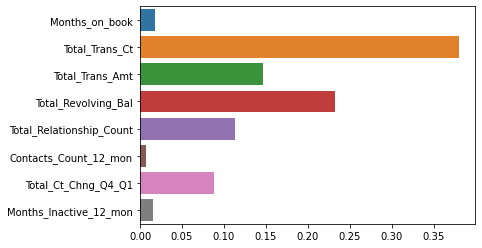

In [223]:
import seaborn as sns
import numpy as np
print('Feature importances:\n{0}'.format(np.round(dt_clf.feature_importances_, 3)))

top_lst = {}
lst = []

for name, value in zip(X_train.columns, dt_clf.feature_importances_):
    top_lst[name] = value
    print('{0} : {1:.3f}'.format(name, value))
sns.barplot(x = dt_clf.feature_importances_, y = X_train.columns)

sorted_dict = sorted(top_lst.items(), key = lambda item :item[1])
for i in sorted_dict:
    if i[1] > 0:
        lst.append(i)
print('************************************')
print('importance가 0보다 큰 columns:')
lst